# ENTREGA

In [1]:
import pandas as pd
import bnlearn as bn
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# Set Pandas options to display more columns
pd.options.display.max_columns=50

# Read in the weather data csv
df=pd.read_csv('weatherAUS.csv', encoding='utf-8')

# Drop records where target RainTomorrow=NaN
df=df[pd.isnull(df['RainTomorrow'])==False]

# For other columns with missing values, fill them in with column mean
df=df.fillna(df.mean())

df.shape

(142193, 23)

In [3]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

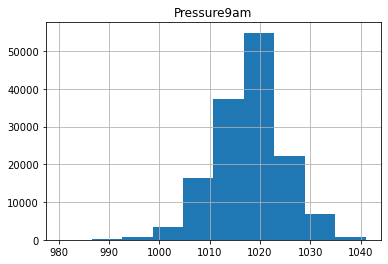

In [4]:
df.hist('Pressure9am')
plt.savefig('Pressure9am.jpg')

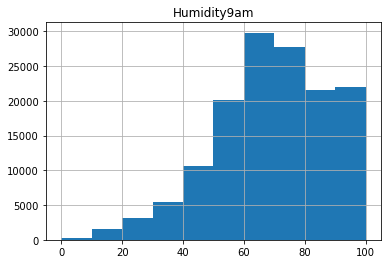

In [5]:
df.hist('Humidity9am')
plt.savefig('Humidity9am.jpg')

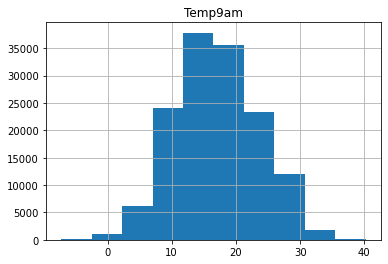

In [6]:
df.hist('Temp9am')
plt.savefig('Temp9am.jpg')

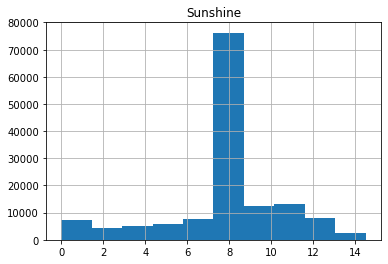

In [7]:
df.hist('Sunshine')
plt.savefig('Sunshine.jpg')

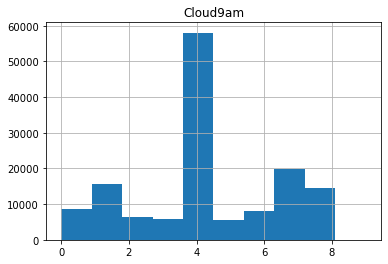

In [8]:
df.hist('Cloud9am')
plt.savefig('Cloud9am.jpg')

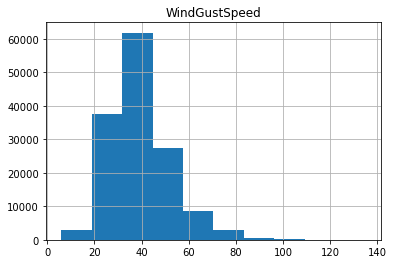

In [9]:
df.hist('WindGustSpeed')
plt.savefig('WindGustSpeed.jpg')

In [10]:
# Create bands for variables that we want to use in the model
df['Humidity9am']=df['Humidity9am'].apply(lambda x: 0 if x<50 else 1)
df['Sunshine']=df['Sunshine'].apply(lambda x: 0 if x<=7 else 1)
df['RainToday']=df['RainToday'].apply(lambda x: 0 if x == 'No' else 1)
df['Temp9am']=df['Temp9am'].apply(lambda x: 0 if x <= 15 else 1)
df['Cloud9am']=df['Temp3pm'].apply(lambda x: 0 if x <= 4 else 1)
df['Pressure9am']=df['Pressure9am'].apply(lambda x: 0 if x <= 1013 else 1)
df['WindGustSpeed']=df['WindGustSpeed'].apply(lambda x: 0 if x <= 30 else 1 if 30 < x <= 50 else 2)

In [11]:
print(min(df['Temp9am']))
print(max(df['Temp9am']))

0
1


In [12]:
print(df['RainTomorrow'].unique())

['No' 'Yes']


In [13]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,1,W,1,W,WNW,20.0,24.0,1,22.0,0,1007.1,1,4.503167,1,21.8,0,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,1,WNW,1,NNW,WSW,4.0,22.0,0,25.0,0,1007.8,1,4.503167,1,24.3,0,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,1,WSW,1,W,WSW,19.0,26.0,0,30.0,0,1008.7,1,2.000000,1,23.2,0,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,1,NE,0,SE,E,11.0,9.0,0,16.0,1,1012.8,1,4.503167,1,26.5,0,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,1,W,1,ENE,NW,7.0,20.0,1,33.0,0,1006.0,1,8.000000,1,29.7,0,No


In [14]:
df_bn = df[['Humidity9am','Sunshine','RainToday','Temp9am','Cloud9am','Pressure9am','WindGustSpeed']]

In [15]:
df_bn.head()

,Humidity9am,Sunshine,RainToday,Temp9am,Cloud9am,Pressure9am,WindGustSpeed
0,1,1,0,1,1,0,1
1,0,1,0,1,1,0,1
2,0,1,0,1,1,0,1
3,0,1,0,1,1,1,0
4,1,1,0,1,1,0,1


In [16]:
df_bn.shape

(142193, 7)

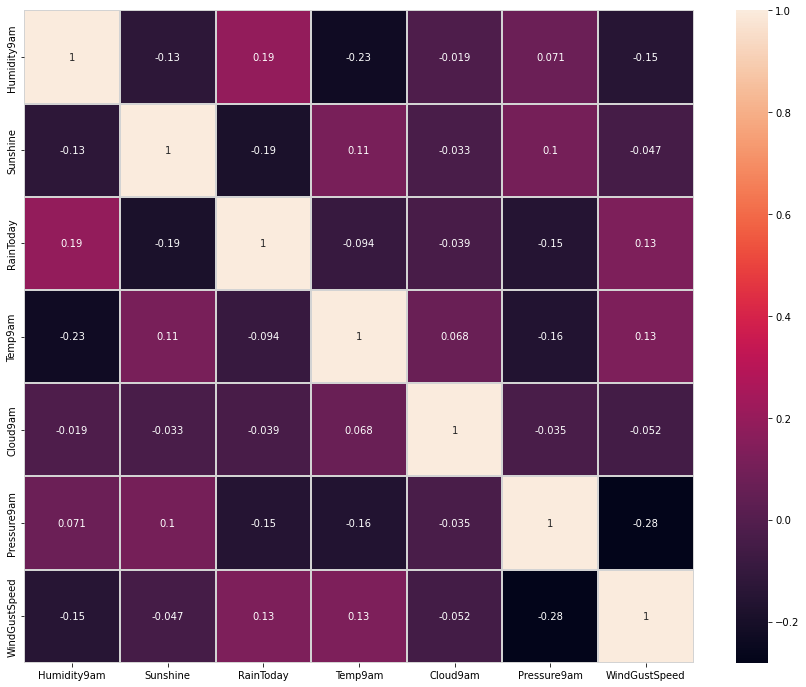

In [17]:
# heatmap of data
import seaborn as sns
plt.figure(figsize = (15, 12))

sns.heatmap(df_bn.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.savefig('corr.png')
plt.show()

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn]> Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


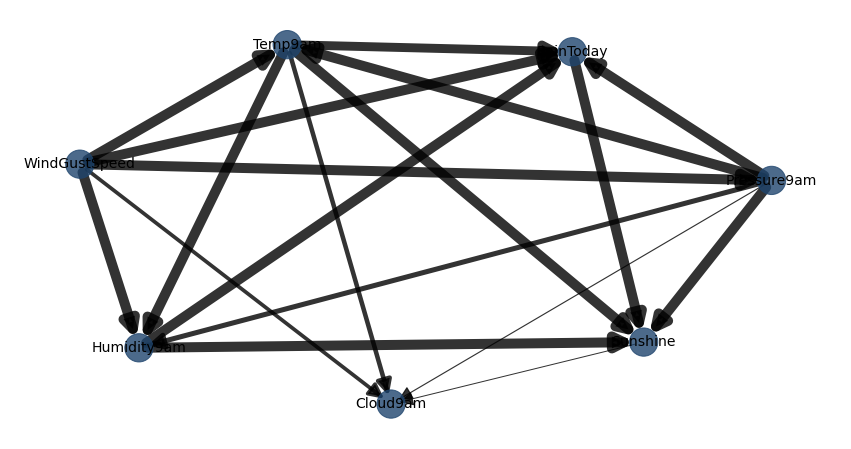

In [18]:
model = bn.structure_learning.fit(df_bn, methodtype='hc', scoretype='bic')
# Compute edge strength with the chi_square test statistic
model = bn.independence_test(model, df_bn, prune=True)
G = bn.plot(model)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
[bnlearn] >CPD of Humidity9am:
+----------------+-----+--------------------+
| Pressure9am    | ... | Pressure9am(1)     |
+----------------+-----+--------------------+
| Temp9am        | ... | Temp9am(1)         |
+----------------+-----+--------------------+
| WindGustSpeed  | ... | WindGustSpeed(2)   |
+----------------+-----+--------------------+
| Humidity9am(0) | ... | 0.2927799886299033 |
+----------------+-----+--------------------+
| Humidity9am(1) | ... | 0.7072200113700966 |
+----------------+-----+--------------------+
[bnlearn] >CPD of Sunshine:
+-------------+-------------------+-----+--------------------+
| Humidity9am | Humidity9am(0)    | ... | Humidity9am(1)     |
+-------------+-------------------+-----+--------------------+
| Pressure9am | Pressure9am(0)    | ... | Pressure9am(1)     |
+-------------+-------------------+-----+--------------------+
| Ra

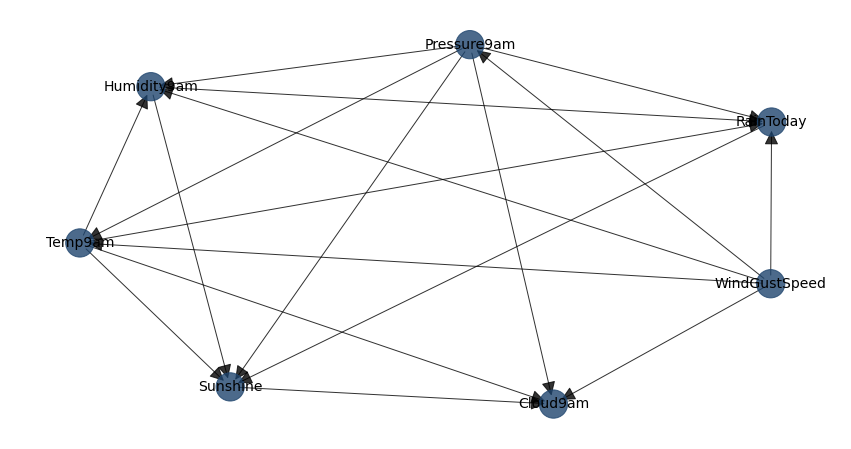

{'pos': {'Humidity9am': array([-0.79815661,  0.76616499]),
  'Sunshine': array([-0.57337678, -0.90370308]),
  'RainToday': array([0.96199598, 0.56969883]),
  'Cloud9am': array([ 0.34345173, -0.99922449]),
  'Temp9am': array([-0.99978106, -0.10303951]),
  'Pressure9am': array([0.10637786, 1.        ]),
  'WindGustSpeed': array([ 0.95948888, -0.32989674])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f5a834f3f10>,
 'node_properties': {'Humidity9am': {'node_color': '#1f456e',
   'node_size': 800},
  'Sunshine': {'node_color': '#1f456e', 'node_size': 800},
  'RainToday': {'node_color': '#1f456e', 'node_size': 800},
  'Temp9am': {'node_color': '#1f456e', 'node_size': 800},
  'Cloud9am': {'node_color': '#1f456e', 'node_size': 800},
  'Pressure9am': {'node_color': '#1f456e', 'node_size': 800},
  'WindGustSpeed': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('Humidity9am', 'Sunshine'): {'color': '#000000',
   'weight': 1},
  ('Humidity9am', 'RainToday'): {'color': '#000

In [19]:
model_update = bn.parameter_learning.fit(model, df_bn)
bn.plot(model_update)

In [20]:
bn.print_CPD(model_update)

CPD of Humidity9am:
+----------------+-----+--------------------+
| Pressure9am    | ... | Pressure9am(1)     |
+----------------+-----+--------------------+
| Temp9am        | ... | Temp9am(1)         |
+----------------+-----+--------------------+
| WindGustSpeed  | ... | WindGustSpeed(2)   |
+----------------+-----+--------------------+
| Humidity9am(0) | ... | 0.2927799886299033 |
+----------------+-----+--------------------+
| Humidity9am(1) | ... | 0.7072200113700966 |
+----------------+-----+--------------------+
CPD of Sunshine:
+-------------+-------------------+-----+--------------------+
| Humidity9am | Humidity9am(0)    | ... | Humidity9am(1)     |
+-------------+-------------------+-----+--------------------+
| Pressure9am | Pressure9am(0)    | ... | Pressure9am(1)     |
+-------------+-------------------+-----+--------------------+
| RainToday   | RainToday(0)      | ... | RainToday(1)       |
+-------------+-------------------+-----+--------------------+
| Temp9am     | 

In [21]:
for cdp in model_update.get('model').get_cpds():
    print(cdp.variable)
    print(cdp.values)
    print(cdp)

Humidity9am
[[[[0.06533666 0.04146919 0.07844363]
   [0.09554052 0.22024781 0.34564125]]

  [[0.0262936  0.0623161  0.09502123]
   [0.11903021 0.21063245 0.29277999]]]


 [[[0.93466334 0.95853081 0.92155637]
   [0.90445948 0.77975219 0.65435875]]

  [[0.9737064  0.9376839  0.90497877]
   [0.88096979 0.78936755 0.70722001]]]]
+----------------+-----+--------------------+
| Pressure9am    | ... | Pressure9am(1)     |
+----------------+-----+--------------------+
| Temp9am        | ... | Temp9am(1)         |
+----------------+-----+--------------------+
| WindGustSpeed  | ... | WindGustSpeed(2)   |
+----------------+-----+--------------------+
| Humidity9am(0) | ... | 0.2927799886299033 |
+----------------+-----+--------------------+
| Humidity9am(1) | ... | 0.7072200113700966 |
+----------------+-----+--------------------+
Sunshine
[[[[[0.21105193 0.13348102]
    [0.31229773 0.24959083]]

   [[0.07541086 0.05676847]
    [0.19876543 0.16522367]]]


  [[[0.38735902 0.20500105]
    [0.41481

In [22]:
df_sampled = bn.sampling(model_update, n=1000000)
df_sampled

[bnlearn] >Forward sampling for 1000000 samples..


  0%|          | 0/7 [00:00<?, ?it/s]

,Humidity9am,Sunshine,RainToday,Cloud9am,Temp9am,Pressure9am,WindGustSpeed
0,1,1,0,1,0,1,0
1,1,1,0,1,0,1,0
2,1,1,1,1,0,0,2
3,1,0,1,1,1,1,1
4,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...
999995,1,1,0,1,1,1,0
999996,0,1,0,1,0,1,2
999997,1,1,1,1,1,0,1
999998,1,1,0,1,1,0,1


In [23]:
model_update_approximate = bn.parameter_learning.fit(model, df_sampled)
bn.print_CPD(model_update_approximate)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
[bnlearn] >CPD of Humidity9am:
+----------------+-----+--------------------+
| Pressure9am    | ... | Pressure9am(1)     |
+----------------+-----+--------------------+
| Temp9am        | ... | Temp9am(1)         |
+----------------+-----+--------------------+
| WindGustSpeed  | ... | WindGustSpeed(2)   |
+----------------+-----+--------------------+
| Humidity9am(0) | ... | 0.2927432672564816 |
+----------------+-----+--------------------+
| Humidity9am(1) | ... | 0.7072567327435184 |
+----------------+-----+--------------------+
[bnlearn] >CPD of Sunshine:
+-------------+--------------------+-----+--------------------+
| Humidity9am | Humidity9am(0)     | ... | Humidity9am(1)     |
+-------------+--------------------+-----+--------------------+
| Pressure9am | Pressure9am(0)     | ... | Pressure9am(1)     |
+-------------+--------------------+-----+--------------------+

In [27]:
for cdp in model_update_approximate.get('model').get_cpds():
    print(cdp.variable)
    print(cdp.values)

Humidity9am
[[[[0.07824215 0.04351056 0.07775166]
   [0.09546469 0.22078354 0.34766625]]

  [[0.02612878 0.06207134 0.09638983]
   [0.12029924 0.21090265 0.29274327]]]


 [[[0.92175785 0.95648944 0.92224834]
   [0.90453531 0.77921646 0.65233375]]

  [[0.97387122 0.93792866 0.90361017]
   [0.87970076 0.78909735 0.70725673]]]]
Sunshine
[[[[[0.22512938 0.13381628]
    [0.30024865 0.25341514]]

   [[0.07810123 0.05633447]
    [0.21080257 0.17308901]]]


  [[[0.39180512 0.20642235]
    [0.41128821 0.39226857]]

   [[0.20916574 0.13162778]
    [0.35060293 0.27032342]]]]



 [[[[0.77487062 0.86618372]
    [0.69975135 0.74658486]]

   [[0.92189877 0.94366553]
    [0.78919743 0.82691099]]]


  [[[0.60819488 0.79357765]
    [0.58871179 0.60773143]]

   [[0.79083426 0.86837222]
    [0.64939707 0.72967658]]]]]
RainToday
[[[[[0.51597161 0.72603355 0.69061605]
    [0.87849018 0.96336098 0.93802555]]

   [[0.93067635 0.93478197 0.86084332]
    [0.97277692 0.9746903  0.96301102]]]


  [[[0.54767643 0.

In [24]:
df_bn.head()

,Humidity9am,Sunshine,RainToday,Temp9am,Cloud9am,Pressure9am,WindGustSpeed
0,1,1,0,1,1,0,1
1,0,1,0,1,1,0,1
2,0,1,0,1,1,0,1
3,0,1,0,1,1,1,0
4,1,1,0,1,1,0,1


In [25]:

#q1 = bn.inference.fit(DAG, variables=['RainTomorrow'], evidence={'WindGustSpeed':1, 'Humidity9am':0, 
                                                                'Humidity3pm':1, 'RainToday': 0,
                                                                     'Temp9am': 1, 'Temp3pm':1})

IndentationError: unexpected indent (1879058834.py, line 2)